## Importing relevant libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_extraction import extract_data
from utility_functions import clean, handle_missing_values, \
convert_values, calculate_profit, calculate_roi, rank_movies, get_top_directors, get_top_franchises, \
compare_franchise_vs_standalone, filter_movies_by_actor_director, filter_movies_by_genre_and_actor, \
filter_valid_movies, filter_released_movies, plot_movie_analysis

## Loading dataset

In [43]:
data = pd.read_csv('raw_movie_data.csv')

## Cleaning movie data

In [44]:
df_cleaned = clean(data)

## Generating KPIs and Analysis

### Calculating Revenue over Income

In [30]:
calc_roi = calculate_roi(df_cleaned)

In [31]:
calc_roi

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,title,vote_average,vote_count,credits,budget_musd,revenue_musd,roi,profit_musd,director,is_franchise
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,None,356000000,,299534,['US'],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,Avengers: Endgame,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",356.0,2799.439100,7.863593,2443.439100,,False
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,None,237000000,,19995,['US'],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,Avatar,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",237.0,2923.706026,12.336312,2686.706026,,False
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,None,245000000,,140607,['US'],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Star Wars: The Force Awakens,7.262,19667,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",245.0,2068.223624,8.441729,1823.223624,,False
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,None,300000000,,299536,['US'],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,Avengers: Infinity War,8.236,30390,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",300.0,2052.415039,6.841383,1752.415039,,False
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,,597,['US'],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,Titanic,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.0,2264.162353,11.320812,2064.162353,,False
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,None,150000000,,135397,['US'],en,Twenty-two years after the events of Jurassic ...,18.1524,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Jurassic World,6.693,20626,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",150.0,1671.537444,11.143583,1521.537444,,False
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,None,260000000,,420818,['US'],en,"Simba idolizes his father, King Mufasa, and ta...",21.9093,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,The Lion King,7.109,10302,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",260.0,1662.020819,6.392388,1402.020819,,False
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,None,220000000,,24428,['US'],en,When an unexpected enemy emerges and threatens...,34.6271,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,The Avengers,7.734,31510,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",220.0,1518.815515,6.903707,1298.815515,,False
8,/cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg,None,190000000,,168259,['US'],en,Deckard Shaw seeks revenge against Dominic Tor...,14.4012,/wurKlC3VKUgcfsn0K51MJYEleS2.jpg,...,Furious 7,7.200,10763,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",190.0,1515.400000,7.975789,1325.400000,,False
9,/6YwkGolwdOMNpbTOmLjoehlVWs5.jpg,None,365000000,,99861,['US'],en,When Tony Stark tries to jumpstart a dormant p...,17.1305,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,Avengers: Age of Ultron,7.271,23349,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",365.0,1405.403694,3.850421,1040.403694,,False


### Rank movies by Revenue

In [32]:
rank_movies(df_cleaned, 'revenue_musd')

,title,revenue_musd,vote_count
1,Avatar,2923.706026,32119
0,Avengers: Endgame,2799.439100,26214
4,Titanic,2264.162353,25867
2,Star Wars: The Force Awakens,2068.223624,19667
3,Avengers: Infinity War,2052.415039,30390
5,Jurassic World,1671.537444,20626
6,The Lion King,1662.020819,10302
7,The Avengers,1518.815515,31510
8,Furious 7,1515.400000,10763
13,Frozen II,1453.683476,9870


### Rank movies by top profit

In [8]:
top_profit = rank_movies(df_cleaned, 'profit_musd')

### Rank movies by vote average

In [24]:
rank_movies(df_cleaned[df_cleaned['vote_count'] >= 10], 'vote_average')

,title,vote_average,vote_count
0,Avengers: Endgame,8.238,26214
3,Avengers: Infinity War,8.236,30390
11,Harry Potter and the Deathly Hallows: Part 2,8.087,20938
4,Titanic,7.900,25867
7,The Avengers,7.734,31510
1,Avatar,7.588,32119
17,Incredibles 2,7.454,13024
10,Black Panther,7.373,22491
9,Avengers: Age of Ultron,7.271,23349
2,Star Wars: The Force Awakens,7.262,19667


### Get top directors

In [22]:
get_top_directors(df_cleaned)

,director,total_movies,total_revenue,mean_rating
0,,18,30452.54985,7.385056


### Get top franchises

In [23]:
get_top_franchises(df_cleaned)

,belongs_to_collection,total_movies,total_budget,total_revenue,mean_revenue,mean_rating


### Comparing franchise with standalone

In [19]:
compare_franchise_vs_standalone(df_cleaned)

,is_franchise,mean_revenue,median_roi,mean_budget,mean_popularity,mean_rating
0,False,1691.808325,7.888409,215.444444,20.571317,7.385056


### Filter released movies

In [20]:
filter_released_movies(df_cleaned)

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,title,vote_average,vote_count,credits,budget_musd,revenue_musd,roi,profit_musd,director,is_franchise
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,None,356000000,,299534,['US'],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,Avengers: Endgame,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",356.0,2799.439100,7.863593,2443.439100,,False
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,None,237000000,,19995,['US'],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,Avatar,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",237.0,2923.706026,12.336312,2686.706026,,False
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,None,245000000,,140607,['US'],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Star Wars: The Force Awakens,7.262,19667,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",245.0,2068.223624,8.441729,1823.223624,,False
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,None,300000000,,299536,['US'],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,Avengers: Infinity War,8.236,30390,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",300.0,2052.415039,6.841383,1752.415039,,False
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,,597,['US'],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,Titanic,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.0,2264.162353,11.320812,2064.162353,,False
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,None,150000000,,135397,['US'],en,Twenty-two years after the events of Jurassic ...,18.1524,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Jurassic World,6.693,20626,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",150.0,1671.537444,11.143583,1521.537444,,False
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,None,260000000,,420818,['US'],en,"Simba idolizes his father, King Mufasa, and ta...",21.9093,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,The Lion King,7.109,10302,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",260.0,1662.020819,6.392388,1402.020819,,False
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,None,220000000,,24428,['US'],en,When an unexpected enemy emerges and threatens...,34.6271,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,The Avengers,7.734,31510,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",220.0,1518.815515,6.903707,1298.815515,,False
8,/cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg,None,190000000,,168259,['US'],en,Deckard Shaw seeks revenge against Dominic Tor...,14.4012,/wurKlC3VKUgcfsn0K51MJYEleS2.jpg,...,Furious 7,7.200,10763,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",190.0,1515.400000,7.975789,1325.400000,,False
9,/6YwkGolwdOMNpbTOmLjoehlVWs5.jpg,None,365000000,,99861,['US'],en,When Tony Stark tries to jumpstart a dormant p...,17.1305,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,Avengers: Age of Ultron,7.271,23349,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",365.0,1405.403694,3.850421,1040.403694,,False


### Filter valid movies

In [21]:
filter_valid_movies(df_cleaned)

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,title,vote_average,vote_count,credits,budget_musd,revenue_musd,roi,profit_musd,director,is_franchise
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,None,356000000,,299534,['US'],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,Avengers: Endgame,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",356.0,2799.439100,7.863593,2443.439100,,False
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,None,237000000,,19995,['US'],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,Avatar,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",237.0,2923.706026,12.336312,2686.706026,,False
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,None,245000000,,140607,['US'],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Star Wars: The Force Awakens,7.262,19667,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",245.0,2068.223624,8.441729,1823.223624,,False
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,None,300000000,,299536,['US'],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,Avengers: Infinity War,8.236,30390,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",300.0,2052.415039,6.841383,1752.415039,,False
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,,597,['US'],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,Titanic,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",200.0,2264.162353,11.320812,2064.162353,,False
5,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,None,150000000,,135397,['US'],en,Twenty-two years after the events of Jurassic ...,18.1524,/rhr4y79GpxQF9IsfJItRXVaoGs4.jpg,...,Jurassic World,6.693,20626,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",150.0,1671.537444,11.143583,1521.537444,,False
6,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,None,260000000,,420818,['US'],en,"Simba idolizes his father, King Mufasa, and ta...",21.9093,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,...,The Lion King,7.109,10302,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",260.0,1662.020819,6.392388,1402.020819,,False
7,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,None,220000000,,24428,['US'],en,When an unexpected enemy emerges and threatens...,34.6271,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,...,The Avengers,7.734,31510,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",220.0,1518.815515,6.903707,1298.815515,,False
8,/cHkhb5A4gQRK6zs6Pv7zorHs8Nk.jpg,None,190000000,,168259,['US'],en,Deckard Shaw seeks revenge against Dominic Tor...,14.4012,/wurKlC3VKUgcfsn0K51MJYEleS2.jpg,...,Furious 7,7.200,10763,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",190.0,1515.400000,7.975789,1325.400000,,False
9,/6YwkGolwdOMNpbTOmLjoehlVWs5.jpg,None,365000000,,99861,['US'],en,When Tony Stark tries to jumpstart a dormant p...,17.1305,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,...,Avengers: Age of Ultron,7.271,23349,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",365.0,1405.403694,3.850421,1040.403694,,False


## Visualizations


 Generating: Revenue Vs Budget Plot


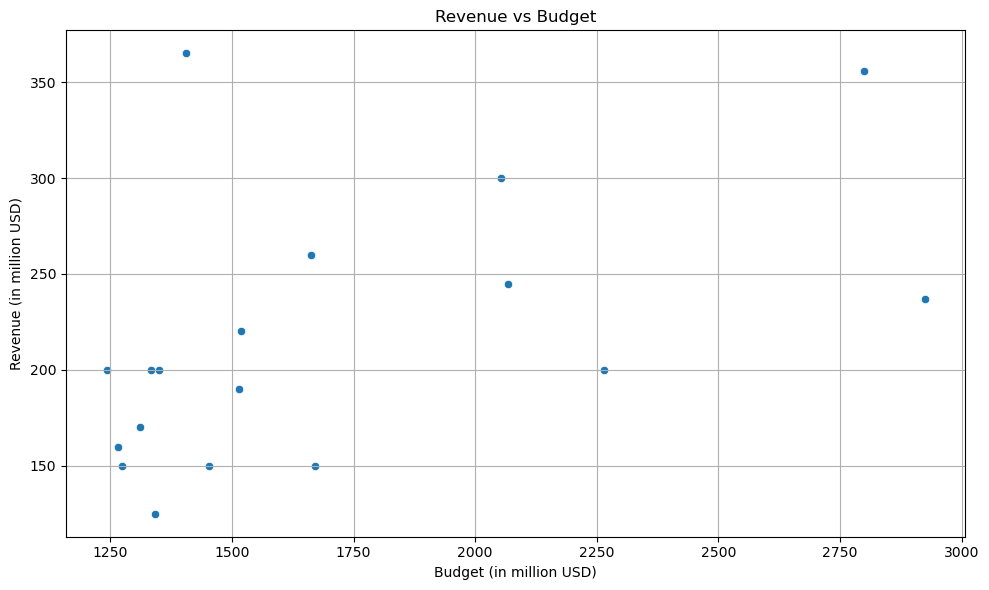


 Generating: Roi By Genre Plot


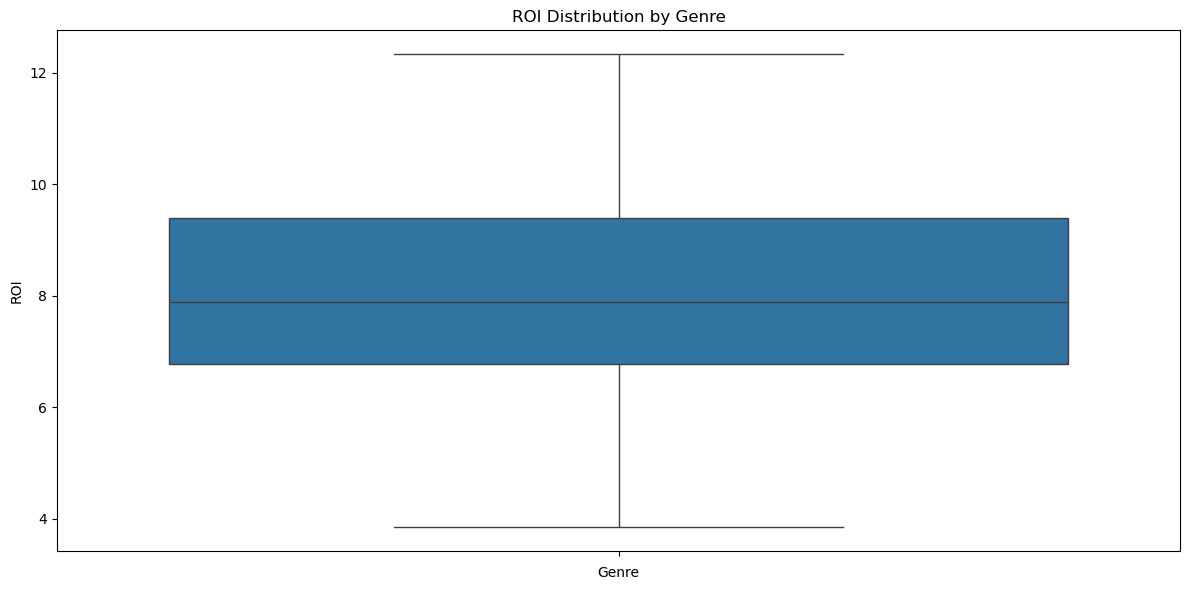


 Generating: Popularity Vs Rating Plot


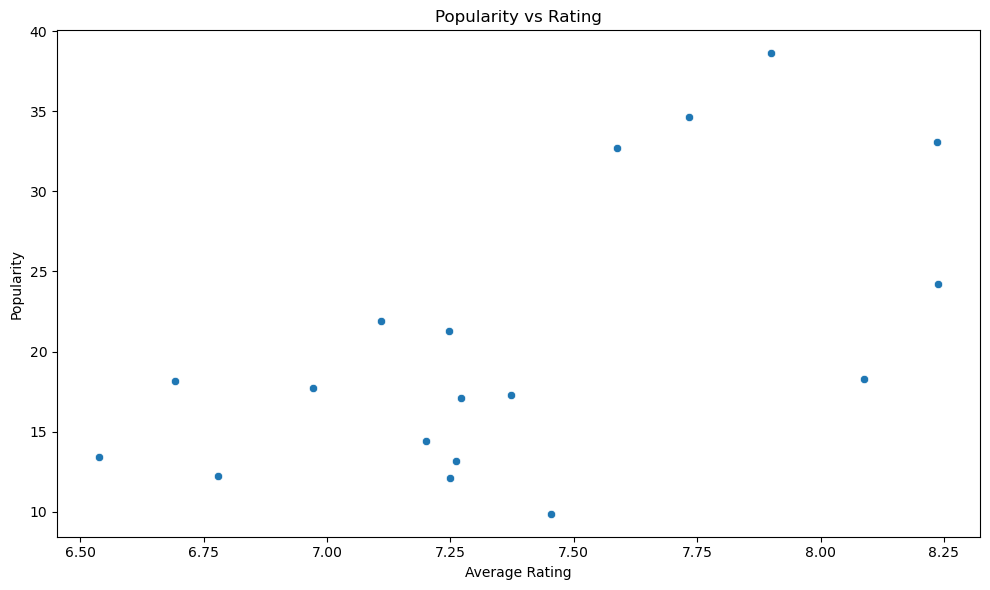


 Generating: Yearly Trends Plot


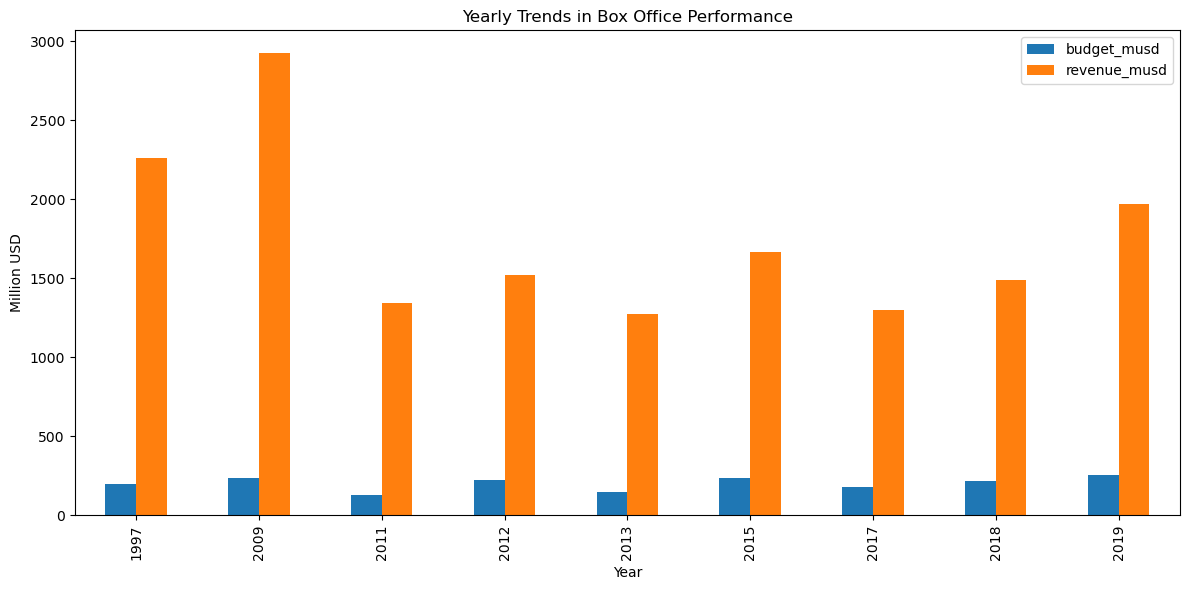


 Generating: Franchise Vs Standalone Plot


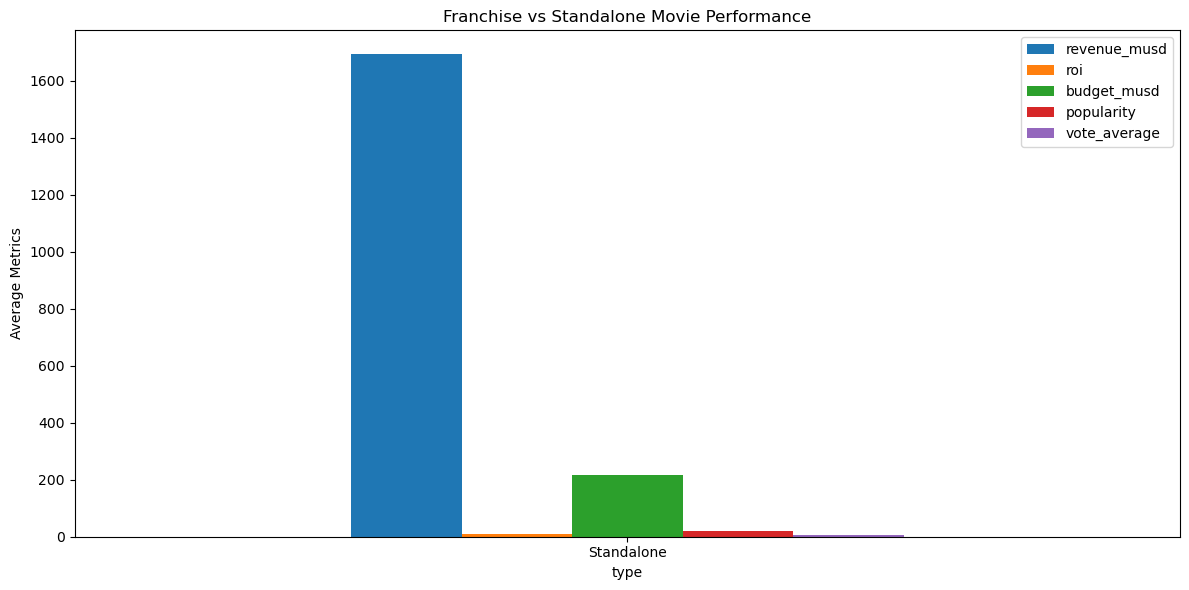

In [18]:
plot_movie_analysis(df_cleaned)